# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api = os.getenv('newsapi_key')

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api)


In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news = newsapi.get_everything(q='bitcoin OR btc', language='en')
print(f'Total Results = {btc_news["totalResults"]}')

Total Results = 4941


In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news = newsapi.get_everything(q='eth OR ethereum', language='en')
print(f'Total Results = {eth_news["totalResults"]}')

Total Results = 1685


In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_senti = []

for article in btc_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']

        btc_senti.append({
            'date': date,
            'compound': compound,
            'negative': neg,
            'neutral': neu,
            'positive': pos,
            'text': text
        })

    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_senti)

btc_df.head()


,date,compound,negative,neutral,positive,text
0,2020-11-25,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...
1,2020-11-20,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
2,2020-11-20,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
3,2020-11-12,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...
4,2020-12-08,0.0000,0.000,1.000,0.000,Keep an eye out today — we may see the first h...


In [7]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_senti = []

for article in eth_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']

        eth_senti.append({
            'date': date,
            'compound': compound,
            'negative': neg,
            'neutral': neu,
            'positive': pos,
            'text': text
        })

    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_senti)

eth_df.head()

,date,compound,negative,neutral,positive,text
0,2020-11-12,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...
1,2020-11-20,0.0000,0.0,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
2,2020-11-20,0.0000,0.0,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
3,2020-11-26,0.0000,0.0,1.000,0.000,The New York Times is (probably) about to publ...
4,2020-11-23,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.174653,0.023368,0.910684,0.065947
std,0.308415,0.050257,0.083600,0.057874
min,-0.670500,0.000000,0.737000,0.000000
25%,0.000000,0.000000,0.869000,0.000000
50%,0.177900,0.000000,0.923000,0.054000
75%,0.421150,0.020500,1.000000,0.120000
max,0.636900,0.199000,1.000000,0.162000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,negative,neutral,positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.186461,0.002611,0.946333,0.051056
std,0.254657,0.011078,0.080479,0.078879
min,0.000000,0.000000,0.682000,0.000000
25%,0.000000,0.000000,0.920500,0.000000
50%,0.088950,0.000000,0.974000,0.026000
75%,0.223325,0.000000,1.000000,0.069750
max,0.877900,0.047000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: ETH

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [130]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stew1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [137]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    # Remove the punctuation
    for word in words:
        if word in punctuation:
            words.remove(word)
    # Remove the stop words
    words = [word for word in words if word not in set(stopwords.words('english'))]
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in words]

    return tokens


In [138]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
btc_token = []

for text in btc_df.text:
    btc_token.append(tokenizer(text))

token = pd.Series(btc_token)

btc_df['token'] = token

btc_df.head()

,date,compound,negative,neutral,positive,text,token
0,2020-11-25,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[youve, watching, crypto, market, past, week, ..."
1,2020-11-20,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staff, representation, virtual, curr..."
2,2020-11-20,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staff, representation, virtual, curr..."
3,2020-11-12,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
4,2020-12-08,0.0000,0.000,1.000,0.000,Keep an eye out today — we may see the first h...,"[keep, eye, today, —, may, see, first, high-al..."


In [88]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
eth_token = []

for text in eth_df.text:
    eth_token.append(tokenizer(text))

token = pd.Series(eth_token)

eth_df['token'] = token

eth_df.head()

,date,compound,negative,neutral,positive,text,token
0,2020-11-12,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newly-announced, support, c..."
1,2020-11-20,0.0000,0.0,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staff, representation, virtual, curr..."
2,2020-11-20,0.0000,0.0,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[reuters, staff, representation, virtual, curr..."
3,2020-11-26,0.0000,0.0,1.000,0.000,The New York Times is (probably) about to publ...,"[new, york, time, probably, publish, story, cr..."
4,2020-11-23,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [28]:
from collections import Counter
from nltk import ngrams

In [145]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
def processor(df):
    for token in df.token:
        words = [word for word in token]
    return words

def bigram_counter(df, n=2):
    processed = processor(df)
    bigrams = ngrams(processed, n=n)
    top_10 = dict(Counter(bigrams))
    return top_10

bigram_counter(btc_df)

{('advent', 'coronavirus'): 1,
 ('coronavirus', 'vaccine'): 1,
 ('vaccine', 'reshuffled'): 1,
 ('reshuffled', 'global'): 1,
 ('global', 'market'): 1,
 ('market', 'travel'): 1,
 ('travel', 'stock'): 1,
 ('stock', 'staging'): 1,
 ('staging', 'long-awaited'): 1,
 ('long-awaited', 'comeback'): 1,
 ('comeback', 'stay-at-home'): 1,
 ('stay-at-home', 'faithful'): 1,
 ('faithful', 'like'): 1,
 ('like', 'zoom'): 1,
 ('zoom', 'amazon'): 1,
 ('amazon', 'struggling'): 1,
 ('struggling', 'maintain'): 1,
 ('maintain', 's…'): 1,
 ('s…', '+2238'): 1,
 ('+2238', 'char'): 1}

In [115]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_counter(eth_df)

{('reuters', 'staff'): 1,
 ('staff', 'file'): 1,
 ('file', 'photo'): 1,
 ('photo', 'representation'): 1,
 ('representation', 'virtual'): 1,
 ('virtual', 'currency'): 1,
 ('currency', 'bitcoin'): 1,
 ('bitcoin', 'seen'): 1,
 ('seen', 'front'): 1,
 ('front', 'stock'): 1}

In [167]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    processed = processor(tokens)
    token_count = dict(Counter(processed).most_common(N))
    return [token_count]

In [168]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(btc_df)


[{'advent': 1,
  'coronavirus': 1,
  'vaccine': 1,
  'reshuffled': 1,
  'global': 1,
  'market': 1,
  'travel': 1,
  'stock': 1,
  'staging': 1,
  'long-awaited': 1}]

In [139]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(eth_df)

[{'photo': 2,
  'reuters': 1,
  'staff': 1,
  'file': 1,
  'representation': 1,
  'virtual': 1,
  'currency': 1,
  'bitcoin': 1,
  'seen': 1,
  'front': 1}]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

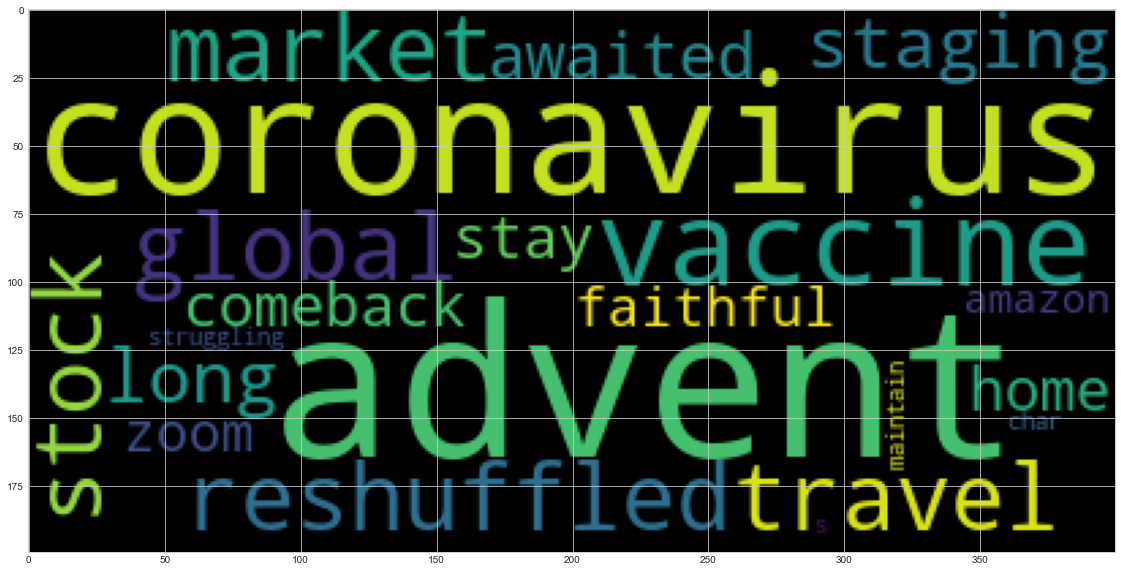

In [174]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def word_list(df):
    processed = processor(df)
    token_count = dict(Counter(processed))
    keys = [key for key in token_count.keys()]
    keys = ' '.join(keys)
    return keys

wc = WordCloud().generate(word_list(btc_df))
plt.imshow(wc)

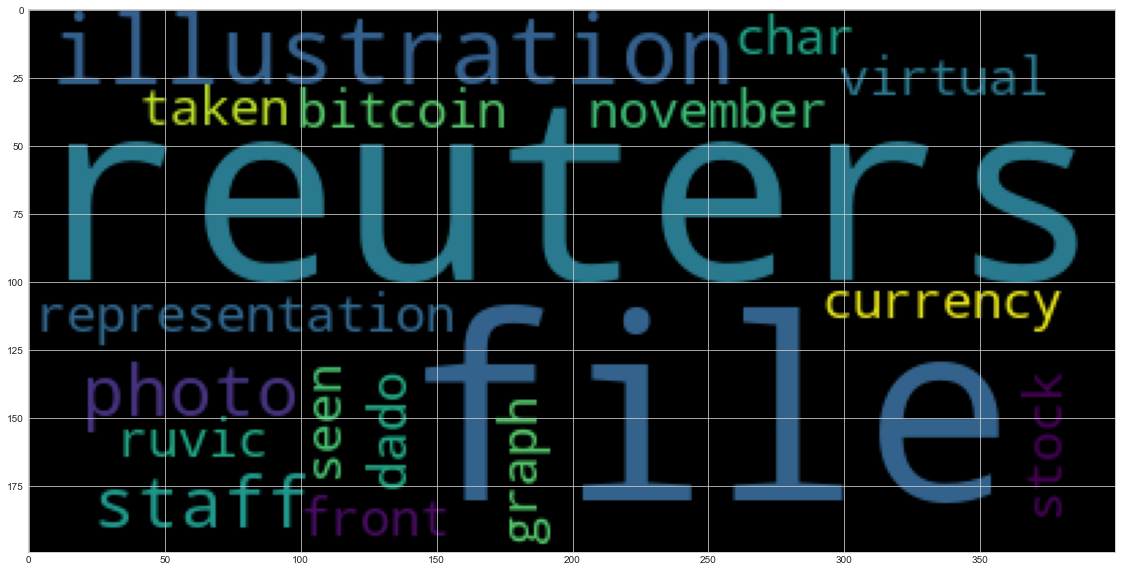

In [175]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(word_list(eth_df))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [176]:
import spacy
from spacy import displacy

In [177]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [179]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [181]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
text = [text for text in btc_df.text]
text = ' '.join(text)
text

"If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars] By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars] By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1388 chars] A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars] Keep an eye out today — we may see the first high-altitude test flight for SpaceX’s Starship. The vehicle Elon Musk sees as the key

In [186]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(text)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = 'BTC NER'

In [187]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [189]:
# List all Entities
# YOUR CODE HERE!
entities = [ent.text for ent in doc.ents]
entities

['the past few weeks',
 'bitcoin',
 'digital',
 'hype',
 'Reuters',
 'Bitcoin',
 'November 19, 2020',
 'REUTERS/',
 'Reuters',
 'Reuters',
 'Bitcoin',
 'November 19, 2020',
 'REUTERS/',
 'Reuters',
 'Microsoft',
 'Ukraine',
 'nine years',
 'more than $10 million',
 'Microsoft',
 '2016 to 2018',
 'today',
 'first',
 'Elon Musk',
 'Earth',
 'Visa',
 'first',
 'Bitcoin',
 'November 2017',
 'two-month',
 'Bitcoin',
 '10,000',
 'first',
 'the next 20 days',
 '19,665',
 'Bitcoin',
 'March 13, 2020',
 'REUTERS/',
 'Tom Wilson',
 'Tom Wilson',
 'Chavez-Dreyfuss',
 'LONDON',
 'Reuters',
 'Bitcoin',
 'Tuesday',
 'December 2017',
 'LONDON',
 'Reuters',
 'Bitcoin',
 '17,000',
 'Tuesday',
 'this year',
 'LONDON',
 'Reuters',
 'Bitcoin',
 'Tuesday',
 'December 2017',
 'PayPal',
 'US',
 'first',
 'US',
 'October',
 'NEW YORK',
 'Reuters',
 'Grayscale',
 'Wednesday',
 'a record $10.4 billion',
 'nearly three years',
 'Bitcoin',
 'over $15k',
 'BTC',
 'New Bitcoin',
 'Rick Wilking',
 'Mike Novogratz',


---

## Ethereum NER

In [190]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
text = [text for text in eth_df.text]
text = ' '.join(text)
text

"PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars] By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1388 chars] The New York Times is (probably) about to publish a story about cryptocurrency exchange Coinbase. But we're not reading about it on the news outlet's website, because Coinbase has taken the highly un… [+3993 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, Feb

In [192]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(text)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = 'ETH NER'

In [193]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [195]:
# List all Entities
# YOUR CODE HERE!
entities = [ent.text for ent in doc.ents]
entities

['PayPal',
 'US',
 'first',
 'US',
 'October',
 'Reuters',
 'Bitcoin',
 'November 19, 2020',
 'REUTERS/',
 'Reuters',
 'Reuters',
 'Bitcoin',
 'November 19, 2020',
 'REUTERS/',
 'Reuters',
 'The New York Times',
 'Coinbase',
 'FILE',
 'February 3, 2018',
 'REUTERS/',
 'Reuters',
 'February 3, 2018',
 'REUTERS/',
 'Reuters',
 'LONDON',
 'Reuters',
 'XRP',
 'Monday',
 'ETH',
 '0.00011',
 'about 5¢',
 'ANYbotics',
 'four',
 '$22.3M Swiss Franc',
 'scalin',
 'LONDON',
 'Reuters',
 'Bitcoin',
 '17,000',
 'Tuesday',
 'this year',
 'LONDON',
 'Reuters',
 'Bitcoin',
 'Tuesday',
 'December 2017',
 'Bitcoin',
 'March 13, 2020',
 'REUTERS/',
 'Tom Wilson',
 'Tom Wilson',
 'Chavez-Dreyfuss',
 'LONDON',
 'Reuters',
 'Bitcoin',
 'Tuesday',
 'December 2017',
 'NEW YORK',
 'Reuters',
 '$429 million',
 'the week ended Dec. 7',
 'second',
 'NEW YORK',
 'Reuters',
 '$429 million',
 'the week ended Dec. 7',
 'second',
 'PayPal',
 'the Generosity Network',
 '20,000',
 'Reuters',
 'Bitcoin',
 'November 19, 